# Calculation of Hinge and lever geometry parameters

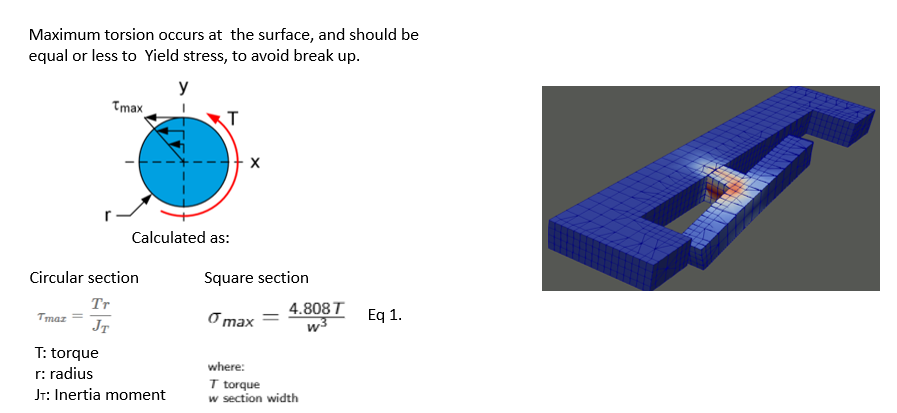

Elastic limit of Silicon  found to be = 165 MPa . See: https://www.azom.com/properties.aspx?ArticleID=599

For a given width of 75e-6 m or 100e-6, we can calculate what the maximum Torque allowable can be, for the given elastic limit. 
(Here Im considering a square section, I know is rectangular section 100x75um, we need to update this function for another function involving widht & height, which is a more complex function, to be done later.)

Lets write a function to calculate the allowable torque from Eq 1.

In [41]:
# coding=utf-8
import math

def AllowableTorque(StressMax, width):
    #this is equation 1, isolating T
    return StressMax*pow(width,3)/4.808


def myprint(str, units, name):
    print(str+" "+"{0:.2e}".format(name)+units)  
    
    
#material property:
StressMax = 165e6       #165e6 silicon   250e6 steel

#geometry
axis_width = 75e-6    #assumming a square

torque = AllowableTorque(StressMax, axis_width)

myprint('AllowableTorque', '[Nm]', torque)

AllowableTorque 1.45e-05[Nm]


Now we need to use twist angle equation to investigate the rest of the geometry, particularly L. The longer the L, the less the angle and the less of stress, but the larger geometry!

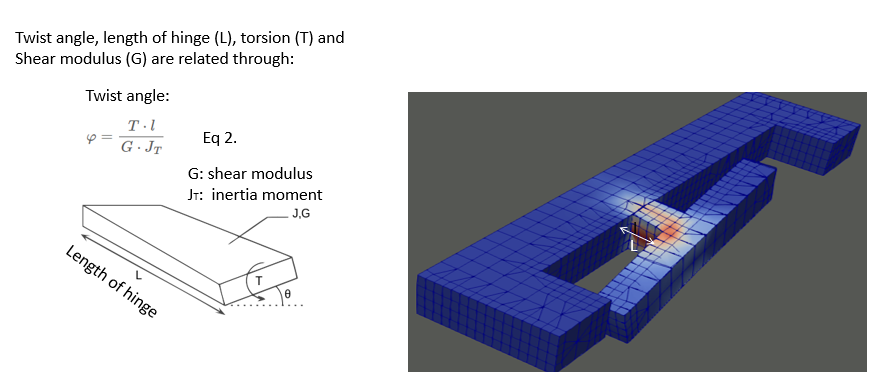

We can isolate length of hinge from equation 2:

$l = \dfrac{\varphi G J}{T}$


Here we need to find the ideal values for twist angle $\varphi$, and lenght L


We can write a function for this equation to be used later on:

In [32]:
def HingeLength(Angle, ShearModulus, InertiaMoment, Torque):

    anglerad = Angle * (math.pi / 180)
    return anglerad * ShearModulus * InertiaMoment / Torque




Let first think on the angle.
How can we predict what angle do we need?
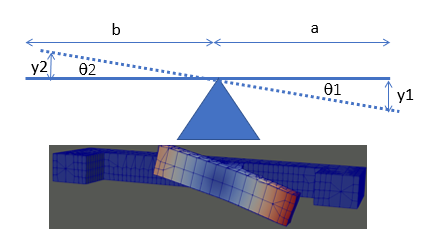

Assuming $\theta_2$ = $\theta_1$   (Neglecting bending of a & b)


then $tan\theta_2 =\frac{y1}{a}$ = $tan\theta_2 =\frac{y2}{b}$

We can see we can control easily the angle with a & b.  

We need to produce a small angle, to produce minimum stress (using long arms a & or b)


We can write functions to calculate angles, and height expected (y2)

In [33]:
def Angle(y1,force_distance):
    #force_distance is a in the figure
    return math.atan(y1/force_distance)*180/math.pi

def HeightValve(lever_distance, angle):
    #lever distance is b in the figure
    return lever_distance*math.tan(angle*math.pi/180)
    



We may first a suitable angle, to then adjust a,b.




Lets write also the function to calculate the Inertia moment of a square section:



In [34]:
def InertiaMoment(width):
    return math.pow(width,4) * 9 / 64

Now lets calculate the hinge half length (L) for this lever dimensions:

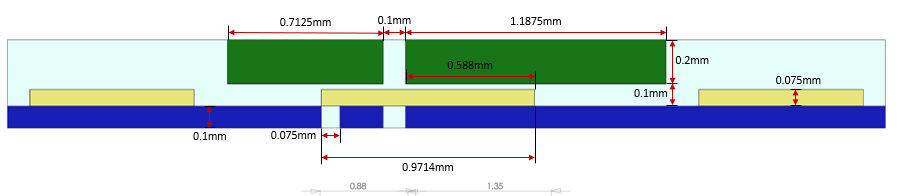

In [44]:
ShearModulus = 64e9  #64 GPa  #steel 80Gpa

#geometry
axis_width = 100e-6 #75e-6   
y1 = 50e-6              #how much pressured lever will go down
force_distance_to_axis = 588e-6 #5e-3 # 10e-3  #afecting angle, therefore hinge size!
gate_distance_to_axis = 971.4e-6-100e-6-force_distance_to_axis #arm to gate

angle = Angle(y1, force_distance_to_axis)
inertiaMoment = InertiaMoment(axis_width)
torque = AllowableTorque(StressMax, axis_width)
safety_torque = torque * 0.5   # we dont want to be in the elastic limit, but well below!
hinge_length = HingeLength(angle, ShearModulus, inertiaMoment, safety_torque)

#myprint('Inertia Moment', '[m4]', inertiaMoment)
#myprint('AllowableTorque', '[Nm]', torque)
#myprint('SafetyTorque', '[Nm]', safety_torque)
myprint('Angle', '[Deg]', angle)
myprint('HeightValve_Y2', '[um]', 1e6*HeightValve(gate_distance_to_axis,angle))

myprint('L  : hinge_half_length', '[mm]', 1e3*hinge_length)
myprint('Whole hinge', '[mm]', 2*1e3*hinge_length)

Angle 4.86e+00[Deg]
HeightValve_Y2 2.41e+01[um]
L  : hinge_half_length 4.45e+00[mm]
Whole hinge 8.90e+00[mm]
